In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat

In [2]:
import plotly.express as px 
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1")

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [8]:
def summary(df):
    print(f'data shape: {df.shape}')  
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    return summ

In [9]:
summary(df)

data shape: (541909, 8)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
InvoiceNo,object,0,0.000000,25900,NaN,NaN,536365,536365,536365
StockCode,object,0,0.000000,4070,NaN,NaN,85123A,71053,84406B
Description,object,1454,0.268311,4223,NaN,NaN,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER
Quantity,int64,0,0.000000,722,-80995.0,80995.0,6,6,8
InvoiceDate,object,0,0.000000,23260,NaN,NaN,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26
UnitPrice,float64,0,0.000000,1630,-11062.06,38970.0,2.55,3.39,2.75
CustomerID,float64,135080,24.926694,4372,12346.0,18287.0,17850.0,17850.0,17850.0
Country,object,0,0.000000,38,NaN,NaN,United Kingdom,United Kingdom,United Kingdom


In [10]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [11]:
df.shape

(406829, 8)

In [12]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

/var/folders/n_/4p37f261177fmjpv4kt7x33m0000gn/T/ipykernel_53888/2436610234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')


In [13]:
df[df['Transaction_Status'] == 'Cancelled'].describe()

,Quantity,UnitPrice,CustomerID
count,8905.000000,8905.000000,8905.000000
mean,-30.859966,18.845519,14991.667266
std,1170.154939,444.366043,1706.772357
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13510.000000
50%,-2.000000,2.950000,14895.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


In [14]:
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10)

In [15]:
top_10_stock_codes

StockCode
85123A    0.005105
22423     0.004683
85099B    0.004085
84879     0.003485
47566     0.003481
20725     0.003340
22720     0.003028
POST      0.002940
20727     0.002768
22197     0.002748
Name: proportion, dtype: float64

In [16]:
incorrect_scodes = [code for code in df['StockCode'].unique() if sum(c.isdigit() for c in str(code)) in (0, 1)]

In [17]:
incorrect_scodes

['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

In [18]:
df = df[~df['StockCode'].isin(incorrect_scodes)]

In [19]:
description_count = df['Description'].value_counts().head(30)

In [20]:
df=df[df['UnitPrice'] > 0]

In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.shape

(404876, 9)

In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
404871,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
404872,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
404873,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
404874,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [25]:
df['Total']=(df["Quantity"] * df["UnitPrice"])

In [26]:
purchase = df.groupby(['Country'], as_index=False)['Total'].agg('sum')
most_purchase_countries = purchase.sort_values('Total', ascending=False).head(10)
fig = go.Figure(data=[
    go.Bar(x=most_purchase_countries['Country'].astype(str), 
           y=most_purchase_countries['Total'],
           marker={'color': most_purchase_countries['Total'],
                   'colorscale': 'viridis'})])
fig.update_traces(texttemplate='£%{y:.3s}', textposition='outside')
fig.update_layout(title='Countries With Highest Total Purchase Amount',
                  title_x=0.5,
                  xaxis_title="Countries",
                  yaxis_title="Amount Sum",
                  plot_bgcolor='white')
fig.show()

In [27]:
min_purchase_countries = purchase.sort_values('Total').head(10)
fig = go.Figure(data=[
    go.Bar(x=min_purchase_countries['Country'].astype(str), 
           y=min_purchase_countries['Total'],
           marker={'color': min_purchase_countries['Total'],
                   'colorscale': 'Viridis'})])
fig.update_traces(texttemplate='£%{y:.2s}', textposition='inside')
fig.update_layout(title='Countries With Lowest Total Purchase Amount',
                  title_x=0.5,
                  xaxis_title="Countries",
                  yaxis_title="Amount Sum",
                  plot_bgcolor='white')
fig.show()

In [28]:

products = df.pivot_table(index="Description", values="Quantity", aggfunc=np.sum).reset_index()
best_selling = products.sort_values('Quantity', ascending=False).head(15)
fig = go.Figure(data=[
    go.Bar(x=best_selling['Description'].astype(str), 
           y=best_selling['Quantity'],
           marker={'color': best_selling['Quantity'],
                   'colorscale': 'viridis'})])
fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')
fig.update_layout(title='15 Popular Products',
                  title_x=0.5,
                  xaxis_title="Products",
                  yaxis_title="Total Quantity",
                  plot_bgcolor='white')
fig.update_xaxes(tickangle=15)
fig.show()

/var/folders/n_/4p37f261177fmjpv4kt7x33m0000gn/T/ipykernel_53888/1613403293.py:1: FutureWarning:

The provided callable <function sum at 0x103628b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [29]:
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Sort and select the top 10 countries with the highest number of transactions
top_customer_countries = customer_country.groupby('Country')['Number_of_Transactions'].sum().sort_values().head(10).reset_index()

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(x=top_customer_countries['Country'].astype(str), 
           y=top_customer_countries['Number_of_Transactions'],
           marker={'color': top_customer_countries['Number_of_Transactions'],
                   'colorscale': 'Viridis'})])
fig.update_traces(texttemplate='%{y}', textposition='inside')
fig.update_layout(title='Countries With Lowest Number of Transactions',
                  title_x=0.5,
                  xaxis_title="Countries",
                  yaxis_title="Number of Transactions",
                  plot_bgcolor='white')
fig.show()

In [30]:
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']

# Group by 'CustomerID' and count the number of cancelled transactions
cancelled_by_customer = cancelled_transactions.groupby('CustomerID').size().reset_index(name='Cancelled_Transactions')

# Sort and select the top 10 customers with the highest number of cancelled transactions
top_cancelled_customers = cancelled_by_customer.sort_values('Cancelled_Transactions', ascending=False).head(10)

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(x=top_cancelled_customers['CustomerID'].astype(str), 
           y=top_cancelled_customers['Cancelled_Transactions'],
           marker={'color': top_cancelled_customers['Cancelled_Transactions'],
                   'colorscale': 'Viridis'})])
fig.update_traces(texttemplate='%{y}', textposition='inside')
fig.update_layout(title='Top 10 Customers With Most Cancelled Transactions',
                  title_x=0.5,
                  xaxis_title="Customer ID",
                  yaxis_title="Number of Cancelled Transactions",
                  plot_bgcolor='white')
fig.show()

In [32]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a 'Month' column
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Group by 'CustomerID' and 'Month', then sum the 'Total'
monthly_spending = df.groupby(['CustomerID', 'Month'])['Total'].sum().reset_index()

# Group by 'CustomerID' again to calculate mean and std
customer_monthly_stats = monthly_spending.groupby('CustomerID')['Total'].agg(['mean', 'std']).reset_index()

# Rename columns for clarity
customer_monthly_stats.columns = ['CustomerID', 'Monthly_Mean_Spending', 'Monthly_Std_Spending']



In [33]:
print(customer_monthly_stats)

      CustomerID  Monthly_Mean_Spending  Monthly_Std_Spending
0        12346.0               0.000000                   NaN
1        12347.0             615.714286            341.070789
2        12348.0             359.310000            203.875689
3        12349.0            1457.550000                   NaN
4        12350.0             294.400000                   NaN
...          ...                    ...                   ...
4357     18280.0             180.600000                   NaN
4358     18281.0              80.820000                   NaN
4359     18282.0              88.300000             14.792674
4360     18283.0             208.893000            168.947794
4361     18287.0             918.640000            216.883792

[4362 rows x 3 columns]


In [34]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Total,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
404871,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,10.20,2011-12
404872,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,12.60,2011-12
404873,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,16.60,2011-12
404874,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,16.60,2011-12


In [36]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by 'InvoiceDate' and sum the 'Total'
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Total'].sum().reset_index()

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(x=daily_sales['InvoiceDate'].astype(str), 
           y=daily_sales['Total'],
           marker={'color': daily_sales['Total'],
                   'colorscale': 'Viridis'})])
fig.update_traces(texttemplate='£%{y:.2s}', textposition='inside')
fig.update_layout(title='Total Sales by Date',
                  title_x=0.5,
                  xaxis_title="Date",
                  yaxis_title="Total Sales",
                  plot_bgcolor='white')
fig.show()

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

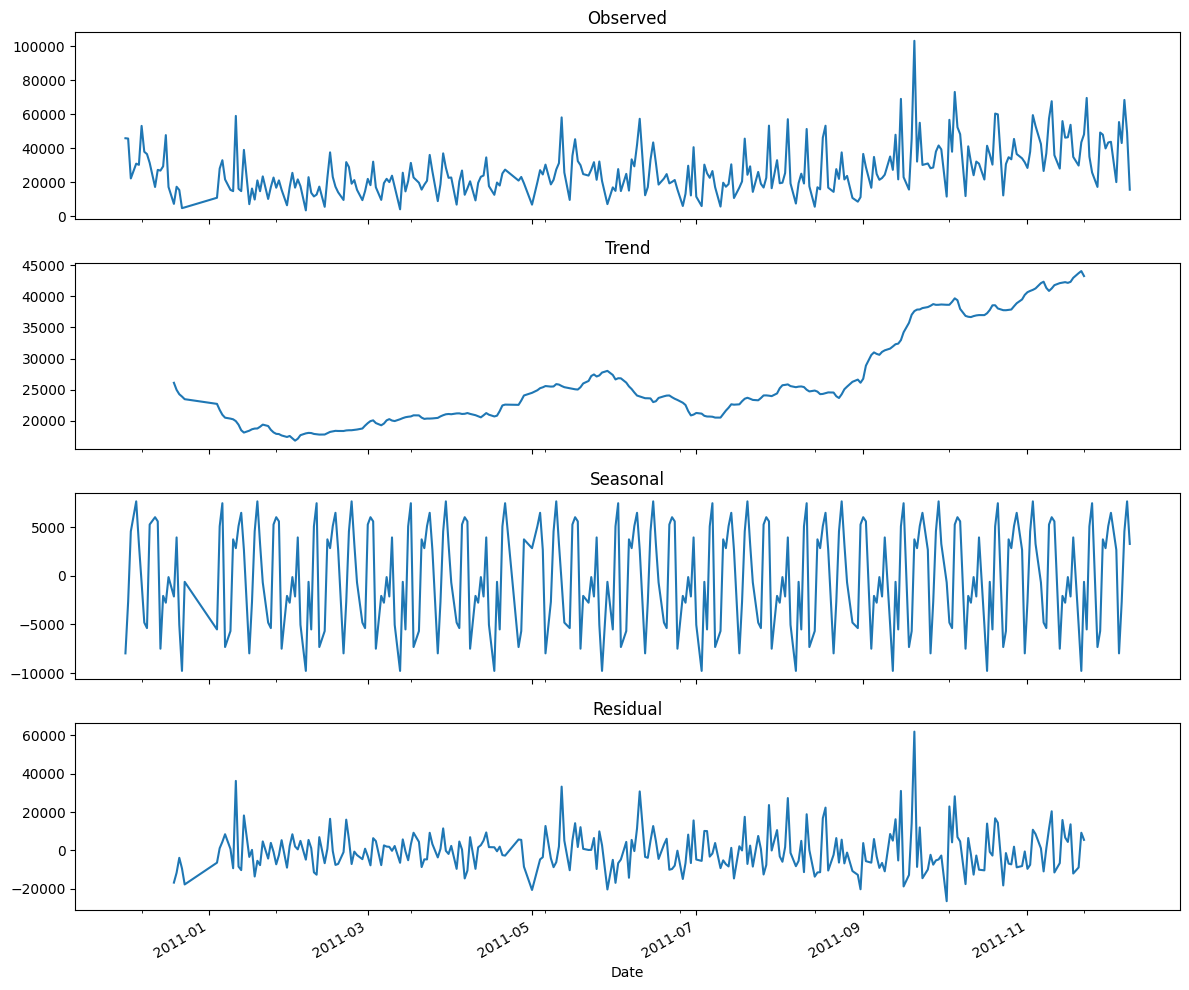

In [39]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by 'InvoiceDate' and sum the 'Total'
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Total'].sum()

# Convert the date to a datetime index
daily_sales.index = pd.to_datetime(daily_sales.index)

# Ensure the data is sorted by date
daily_sales = daily_sales.sort_index()

# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_sales, model='additive', period=30)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [40]:
#Pareto Principle

In [41]:
# Calculate total sales for each customer
customer_sales = df.groupby('CustomerID')['Total'].sum().reset_index()
customer_sales.columns = ['CustomerID', 'TotalPrice']

# Sort customers by total sales in descending order
customer_sales = customer_sales.sort_values(by='TotalPrice', ascending=False)

# Calculate cumulative sales and cumulative percentage
customer_sales['Cumulative_Sales'] = customer_sales['TotalPrice'].cumsum()
customer_sales['Cumulative_Percentage'] = 100 * customer_sales['Cumulative_Sales'] / customer_sales['TotalPrice'].sum()

In [42]:
pareto_cutoff = customer_sales[customer_sales['Cumulative_Percentage'] <= 80]
pareto_customers = pareto_cutoff['CustomerID'].tolist()

print("Customers contributing to the top 80% of total sales:")
print(pareto_customers)

Customers contributing to the top 80% of total sales:
[14646.0, 18102.0, 17450.0, 14911.0, 12415.0, 14156.0, 17511.0, 16684.0, 13694.0, 15311.0, 16029.0, 13089.0, 15061.0, 14096.0, 17949.0, 15769.0, 14298.0, 14088.0, 17841.0, 15098.0, 13798.0, 16422.0, 12931.0, 16013.0, 15838.0, 17389.0, 12748.0, 17404.0, 13098.0, 13081.0, 13408.0, 14680.0, 16333.0, 13777.0, 17857.0, 15749.0, 16210.0, 12753.0, 17381.0, 17675.0, 15039.0, 12731.0, 15159.0, 17428.0, 13881.0, 13767.0, 12921.0, 12471.0, 12901.0, 12678.0, 17677.0, 15856.0, 15189.0, 14051.0, 16839.0, 14031.0, 15513.0, 16133.0, 14866.0, 16705.0, 12433.0, 15498.0, 12477.0, 17735.0, 14258.0, 15640.0, 13078.0, 16000.0, 12621.0, 12681.0, 17340.0, 12557.0, 16525.0, 12939.0, 14606.0, 12540.0, 14194.0, 15125.0, 12409.0, 12682.0, 14895.0, 12971.0, 13340.0, 17581.0, 13319.0, 14769.0, 17139.0, 13113.0, 14062.0, 16779.0, 17107.0, 15615.0, 15251.0, 16180.0, 16843.0, 17865.0, 17706.0, 13001.0, 14607.0, 13199.0, 15078.0, 13458.0, 14733.0, 12590.0, 16523.0, 

In [46]:
(customer_sales['Cumulative_Percentage'].sum())/len(customer_sales)

np.float64(85.45446519031887)

In [57]:
df["Monetary"] = df["Quantity"] * df["UnitPrice"]

# Ensure InvoiceDate is a datetime type.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Calculate Recency in days as the difference from a recent date (which could be today or the last date of your dataset +1)
# Assuming 'df' is your original DataFrame.
current_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
df["Recency"] = (current_date - df["InvoiceDate"]).dt.days

# Group by CustomerID to calculate Frequency and Monetary values per customer
rfm_df = df.groupby("CustomerID").agg({
    "Recency": "min",            # The most recent purchase date for each customer
    "InvoiceNo": "nunique",      # The number of unique transactions (counts of invoices) for frequency
    "Monetary": "sum"           # The total sum for monetary value
})

# Rename columns for clarity
rfm_df.rename(columns={"InvoiceNo": "Frequency"}, inplace=True)

# Reset index to make CustomerID a column
rfm_df.reset_index(inplace=True)

# Inspecting the first few rows of the RFM dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1437.24
3,12349.0,19,1,1457.55
4,12350.0,310,1,294.40


In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [66]:
customer_summary = df.groupby('CustomerID').agg(
    Total_Products_Purchased=pd.NamedAgg(column='Quantity', aggfunc='sum'),
    Total_Spend=pd.NamedAgg(column='Total', aggfunc='sum')
).reset_index()


In [67]:
customer_summary,rfm_df

(      CustomerID  Total_Products_Purchased  Total_Spend
 0        12346.0                         0         0.00
 1        12347.0                      2458      4310.00
 2        12348.0                      2332      1437.24
 3        12349.0                       630      1457.55
 4        12350.0                       196       294.40
 ...          ...                       ...          ...
 4357     18280.0                        45       180.60
 4358     18281.0                        54        80.82
 4359     18282.0                        98       176.60
 4360     18283.0                      1395      2088.93
 4361     18287.0                      1586      1837.28
 
 [4362 rows x 3 columns],
       CustomerID  Recency  Frequency  Monetary  Cluster
 0        12346.0      326          2      0.00        1
 1        12347.0        2          7   4310.00        0
 2        12348.0       75          4   1437.24        0
 3        12349.0       19          1   1457.55        0
 4 

In [68]:
rfm_df_merged = pd.merge(rfm_df, customer_summary, on='CustomerID', how='left')



In [69]:
rfm_df_merged

,CustomerID,Recency,Frequency,Monetary,Cluster,Total_Products_Purchased,Total_Spend
0,12346.0,326,2,0.00,1,0,0.00
1,12347.0,2,7,4310.00,0,2458,4310.00
2,12348.0,75,4,1437.24,0,2332,1437.24
3,12349.0,19,1,1457.55,0,630,1457.55
4,12350.0,310,1,294.40,1,196,294.40
...,...,...,...,...,...,...,...
4357,18280.0,278,1,180.60,1,45,180.60
4358,18281.0,181,1,80.82,1,54,80.82
4359,18282.0,8,3,176.60,0,98,176.60
4360,18283.0,4,16,2088.93,0,1395,2088.93


In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [119]:
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df_merged)

In [120]:
best_score = -1
best_n_clusters = 2
silhouette_scores = []

In [132]:
wcss = []

In [133]:
for n_clusters in range(3, 12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(rfm_df_scaled)
    silhouette_avg = silhouette_score(rfm_df_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters
    wcss.append(kmeans.inertia_)



In [134]:
silhouette_scores


[np.float64(0.4166589434775461),
 np.float64(0.43024275257222594),
 np.float64(0.4362375331841227),
 np.float64(0.48095576117304967),
 np.float64(0.49289383271739334),
 np.float64(0.4929291429101186),
 np.float64(0.3877351680074727),
 np.float64(0.3388971961040873),
 np.float64(0.33960859024390117),
 np.float64(0.4166589434775461),
 np.float64(0.4166589434775461),
 np.float64(0.43024275257222594),
 np.float64(0.4362375331841227),
 np.float64(0.48095576117304967),
 np.float64(0.49289383271739334),
 np.float64(0.4929291429101186),
 np.float64(0.3877351680074727),
 np.float64(0.3388971961040873),
 np.float64(0.33960859024390117)]

In [135]:
print(f"Best number of clusters: {best_n_clusters} with silhouette score: {best_score}")


Best number of clusters: 8 with silhouette score: 0.4929291429101186


In [145]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df_merged['Cluster'] = kmeans.fit_predict(rfm_df_scaled)




In [146]:
# Display the first few rows with cluster label
rfm_df_merged['Cluster'].value_counts()

Cluster
3    1843
0    1492
2    1010
1      17
Name: count, dtype: int64

In [147]:
silhouette_scores.index(max(silhouette_scores))+3

8

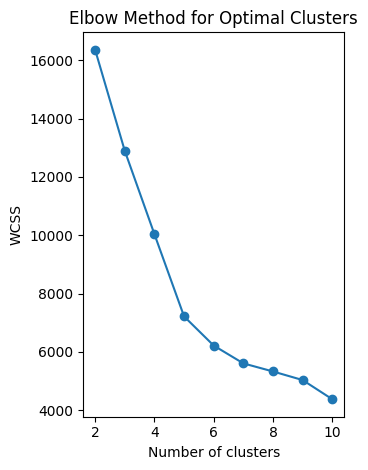

In [148]:
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')

plt.tight_layout()
plt.show()

In [149]:
from mlxtend.frequent_patterns import apriori, association_rules

def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['InvoiceNo', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)


def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code][["Description"]].values[0].tolist()
    print(product_name)


def create_rules(dataframe, id=True, country="France"):
    dataframe = dataframe[dataframe['Country'] == country]
    dataframe = create_invoice_product_df(dataframe, id)
    frequent_itemsets = apriori(dataframe, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
    return rules

In [151]:
df_rec = df.copy()
rules = create_rules(df_rec)

/var/folders/n_/4p37f261177fmjpv4kt7x33m0000gn/T/ipykernel_53888/1259699669.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/Users/saahil/Desktop/Coding_Projects/ML/Customer RFM and Segmentation /env/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [172]:
df=df.drop(columns=['Monetary','Recency'],axis='1')

In [173]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Total,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
404871,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,10.20,2011-12
404872,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,12.60,2011-12
404873,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,16.60,2011-12
404874,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,16.60,2011-12


In [174]:
merged_df = df.merge(rfm_df_merged, on='CustomerID', how='left')

In [175]:
merged_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Total,Month,Recency,Frequency,Monetary,Cluster,Total_Products_Purchased,Total_Spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,15.30,2010-12,302,35,5288.63,2,1693,5288.63
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12,302,35,5288.63,2,1693,5288.63
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,22.00,2010-12,302,35,5288.63,2,1693,5288.63
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12,302,35,5288.63,2,1693,5288.63
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12,302,35,5288.63,2,1693,5288.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404871,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,10.20,2011-12,1,4,790.81,0,439,790.81
404872,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,12.60,2011-12,1,4,790.81,0,439,790.81
404873,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,16.60,2011-12,1,4,790.81,0,439,790.81
404874,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,16.60,2011-12,1,4,790.81,0,439,790.81


In [176]:
product_sales = merged_df.groupby(['Cluster', 'StockCode']).agg({'Quantity': 'sum'}).reset_index()

# Get the top 10 best-selling products for each cluster
top_products = product_sales.groupby('Cluster').apply(lambda x: x.nlargest(10, 'Quantity')).reset_index(drop=True)

print("Top 10 Best-Selling Products in Each Cluster:")
print(top_products)

Top 10 Best-Selling Products in Each Cluster:
    Cluster StockCode  Quantity
0         0     84077     10704
1         0    85099B      9356
2         0     23084      8017
3         0     84879      7954
4         0     21212      7224
5         0     84568      6912
6         0    85123A      5965
7         0     22492      5960
8         0     18007      5752
9         0     15036      5448
10        1     22197     15887
11        1    85099B      8891
12        1     21212      8453
13        1     22629      7779
14        1    85123A      6843
15        1     23084      6544
16        1     22469      6388
17        1     22630      6306
18        1     22189      6114
19        1     22492      5544
20        2     21212      5748
21        2     84077      4993
22        2     22197      4989
23        2    85123A      3941
24        2     84992      3773
25        2     84991      3732
26        2     21108      3320
27        2     21213      3184
28        2     15036     

/var/folders/n_/4p37f261177fmjpv4kt7x33m0000gn/T/ipykernel_53888/3081407509.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [177]:
customer_products = merged_df.groupby(['Cluster', 'CustomerID'])['StockCode'].apply(list).reset_index()

print("Record of Products Purchased by Each Customer in Each Cluster:")
print(customer_products)


Record of Products Purchased by Each Customer in Each Cluster:
      Cluster  CustomerID                                          StockCode
0           0     12347.0  [85116, 22375, 71477, 22492, 22771, 22772, 227...
1           0     12348.0  [84992, 22951, 84991, 84991, 21213, 21213, 226...
2           0     12349.0  [23112, 23460, 21564, 21411, 21563, 22131, 221...
3           0     12352.0  [21380, 22064, 21232, 22646, 22779, 22423, 226...
4           0     12356.0  [22138, 21198, 21114, 21199, 21231, 22060, 220...
...       ...         ...                                                ...
4357        3     18278.0  [22114, 23301, 23355, 22111, 20914, 22727, 234...
4358        3     18281.0  [22037, 22716, 22028, 23007, 23008, 23209, 22467]
4359        3     18282.0  [21270, 23187, 23295, 22089, 21108, 21109, 224...
4360        3     18283.0  [22356, 20726, 22384, 22386, 20717, 20718, 850...
4361        3     18287.0  [22755, 22754, 22753, 22756, 22758, 22757, 227...

[4362 rows x

In [183]:
def generate_recommendations(customer_id, cluster, purchased_products, top_products):
    # Filter top products for the given cluster
    cluster_top_products = top_products[top_products['Cluster'] == cluster]['StockCode']
    
    # Recommend products that the customer hasn't purchased yet
    recommendations = cluster_top_products[~cluster_top_products.isin(purchased_products)]
    
    return recommendations.head(4).tolist()

In [184]:
customer_products['Recommendations'] = customer_products.apply(
    lambda row: generate_recommendations(row['CustomerID'], row['Cluster'], row['StockCode'], top_products), axis=1
)

In [185]:

print("Customer Product Recommendations:")
customer_products

Customer Product Recommendations:


,Cluster,CustomerID,StockCode,Recommendations
0,0,12347.0,"[85116, 22375, 71477, 22492, 22771, 22772, 227...","[84077, 85099B, 84879, 21212]"
1,0,12348.0,"[84992, 22951, 84991, 84991, 21213, 21213, 226...","[84077, 85099B, 23084, 84879]"
2,0,12349.0,"[23112, 23460, 21564, 21411, 21563, 22131, 221...","[84077, 85099B, 23084, 84879]"
3,0,12352.0,"[21380, 22064, 21232, 22646, 22779, 22423, 226...","[84077, 85099B, 23084, 84879]"
4,0,12356.0,"[22138, 21198, 21114, 21199, 21231, 22060, 220...","[84077, 85099B, 23084, 84879]"
...,...,...,...,...
4357,3,18278.0,"[22114, 23301, 23355, 22111, 20914, 22727, 234...","[84077, 85099B, 84879, 22197]"
4358,3,18281.0,"[22037, 22716, 22028, 23007, 23008, 23209, 22467]","[84077, 85099B, 84879, 22197]"
4359,3,18282.0,"[21270, 23187, 23295, 22089, 21108, 21109, 224...","[84077, 85099B, 84879, 22197]"
4360,3,18283.0,"[22356, 20726, 22384, 22386, 20717, 20718, 850...","[84077, 84879, 17003, 22178]"
